In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [8]:
pd.set_option("display.max_columns",100)
df=pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2019-tutorial/master/ted.csv")

In [9]:
df["film_date"]=pd.to_datetime(df["film_date"],unit="s")
df["published_date"]=pd.to_datetime(df["published_date"],unit="s")
df["today"]=pd.to_datetime('today').normalize()


In [10]:
df.head(3)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,today
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2022-06-29
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2022-06-29
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2022-06-29


In [11]:
import ast
df["ratings"]=df["ratings"].apply(lambda x:ast.literal_eval(x))

# Find total count of ratings for each talk

In [12]:
for row,name in zip(df["ratings"],df["name"]):
    total_count=0
    for i in row:
        total_count+=i["count"]
    print(total_count, " - ",name)
        

93850  -  Ken Robinson: Do schools kill creativity?
2936  -  Al Gore: Averting the climate crisis
2824  -  David Pogue: Simplicity sells
3728  -  Majora Carter: Greening the ghetto
25620  -  Hans Rosling: The best stats you've ever seen
15356  -  Tony Robbins: Why we do what we do
5998  -  Julia Sweeney: Letting go of God
1024  -  Joshua Prince-Ramus: Behind the design of Seattle's library
3946  -  Dan Dennett: Let's teach religion -- all religion -- in schools
8327  -  Rick Warren: A life of purpose
1780  -  Cameron Sinclair: My wish: A call for open-source architecture
592  -  Jehane Noujaim: My wish: A global day of film
886  -  Larry Brilliant: My wish: Help me stop pandemics
8317  -  Jeff Han: The radical promise of the multi-touch interface
781  -  Nicholas Negroponte: One Laptop per Child
6239  -  Sirena Huang: An 11-year-old's magical violin
4679  -  Jennifer Lin: Improvising on piano, aged 14
1788  -  Amy Smith: Simple designs to save a life
1931  -  Ross Lovegrove: Organic de

# For each talk find which emotion was expressed most often and its' percentage of total emotion count

In [13]:
for row,name in zip(df["ratings"],df["name"]):
    count=0
    total_count=0
    for i in row:
        total_count+=i["count"]
        if i["count"]>count:
            count=i["count"]
            emotion=i["name"]
    print(count,emotion,round(count/total_count*100,2),"%"," - ",name)

24924 Inspiring 26.56 %  -  Ken Robinson: Do schools kill creativity?
544 Funny 18.53 %  -  Al Gore: Averting the climate crisis
964 Funny 34.14 %  -  David Pogue: Simplicity sells
1070 Inspiring 28.7 %  -  Majora Carter: Greening the ghetto
5433 Informative 21.21 %  -  Hans Rosling: The best stats you've ever seen
5211 Inspiring 33.93 %  -  Tony Robbins: Why we do what we do
2484 Funny 41.41 %  -  Julia Sweeney: Letting go of God
195 Ingenious 19.04 %  -  Joshua Prince-Ramus: Behind the design of Seattle's library
764 Persuasive 19.36 %  -  Dan Dennett: Let's teach religion -- all religion -- in schools
2556 Inspiring 30.7 %  -  Rick Warren: A life of purpose
608 Inspiring 34.16 %  -  Cameron Sinclair: My wish: A call for open-source architecture
201 Inspiring 33.95 %  -  Jehane Noujaim: My wish: A global day of film
240 Inspiring 27.09 %  -  Larry Brilliant: My wish: Help me stop pandemics
4643 Jaw-dropping 55.83 %  -  Jeff Han: The radical promise of the multi-touch interface
216 In

# For each talk find which emotion was expressed the least often

In [14]:
for row in df['ratings']:
    count=10**10
    for i in row:
        if i["count"]<count:
            count=i["count"]
            name=i["name"]
    print(name,count)

Obnoxious 209
Ingenious 56
Confusing 27
Confusing 32
Obnoxious 61
Longwinded 285
Jaw-dropping 61
Obnoxious 5
Funny 60
Funny 26
Obnoxious 7
Obnoxious 1
Confusing 2
Confusing 19
Confusing 6
Confusing 10
Confusing 22
Obnoxious 4
Persuasive 22
Obnoxious 11
Obnoxious 6
Persuasive 20
Jaw-dropping 3
Obnoxious 111
Confusing 13
Obnoxious 21
Obnoxious 39
Confusing 7
Obnoxious 51
Obnoxious 67
Confusing 54
Funny 13
Beautiful 65
Funny 1
Obnoxious 3
Funny 1
Funny 9
Confusing 23
Confusing 1
Confusing 12
Funny 8
Funny 1
Unconvincing 2
Longwinded 37
Funny 18
Funny 11
Obnoxious 3
Longwinded 27
Informative 21
Longwinded 8
Funny 3
Funny 16
Confusing 24
Funny 5
Obnoxious 21
Jaw-dropping 23
Obnoxious 2
Obnoxious 3
Informative 18
Unconvincing 7
Funny 3
Courageous 9
Obnoxious 21
Confusing 7
Obnoxious 5
Funny 3
Obnoxious 27
Confusing 23
Persuasive 29
Courageous 2
Confusing 14
Confusing 7
Obnoxious 14
Funny 12
Persuasive 2
Jaw-dropping 9
Informative 2
Confusing 1
Obnoxious 9
Funny 15
Confusing 11
Obnoxious 0
Pe

# Find 5 talks with the most rating per view 

In [15]:
ratingscount=[]
for row in df["ratings"]:
    ratings_count=0
    for i in row:
        ratings_count+=i["count"]
    ratingscount.append(ratings_count)
df["ratings_count"]=ratingscount
df["ratings_per_view"]=ratingscount/df["views"]

df.sort_values("ratings_per_view",ascending=False).head(5)
        
        

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,today,ratings_count,ratings_per_view
791,225,"In a courageous, intensely emotional talk at t...",775,Fort Worth City Council,2010-10-12,0,Joel Burns,Joel Burns: A message to gay teens: It gets be...,1,2010-10-17 09:22:00,"[{'id': 3, 'name': 'Courageous', 'count': 1254...","[{'id': 931, 'hero': 'https://pe.tedcdn.com/im...",City councilman,"['LGBT', 'TEDYouth', 'humanity', 'social chang...",A message to gay teens: It gets better,https://www.ted.com/talks/joel_burns_tells_gay...,278672,2022-06-29,3219,0.011551
972,92,New York was planning to tear down the High Li...,341,TED2011,2011-03-03,36,Robert Hammond,Robert Hammond: Building a park in the sky,1,2011-06-30 14:54:00,"[{'id': 22, 'name': 'Fascinating', 'count': 19...","[{'id': 8, 'hero': 'https://pe.tedcdn.com/imag...",Friend of the High Line,"['activism', 'architecture', 'cities', 'cultur...",Building a park in the sky,https://www.ted.com/talks/robert_hammond_build...,704205,2022-06-29,8023,0.011393
914,273,Pioneering surgeon Susan Lim performed the fir...,986,INK Conference,2010-12-07,31,Susan Lim,"Susan Lim: Transplant cells, not organs",1,2011-04-15 18:47:00,"[{'id': 3, 'name': 'Courageous', 'count': 1135...","[{'id': 744, 'hero': 'https://pe.tedcdn.com/im...",Surgeon,"['business', 'technology']","Transplant cells, not organs",https://www.ted.com/talks/susan_lim,620231,2022-06-29,6859,0.011059
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,2009-12-02,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,2010-08-17 16:23:00,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395,2022-06-29,2919,0.009983
2171,335,It doesn't matter whether you love or hate gun...,818,TED2016,2016-02-17,19,Dan Gross,Dan Gross: Why gun violence can't be our new n...,1,2016-03-29 14:58:52,"[{'id': 8, 'name': 'Informative', 'count': 154...","[{'id': 1342, 'hero': 'https://pe.tedcdn.com/i...",Gun-control activist,"['Debate', 'Guns', 'activism', 'big problems',...",Why gun violence can't be our new normal,https://www.ted.com/talks/dan_gross_why_gun_vi...,1096198,2022-06-29,10251,0.009351


#  Create column that shows most expressed emotion for that talk

In [16]:
emotion=[]
for row in df["ratings"]:
    rating_count=0
    for i in row:
        if i["count"]>rating_count:
            rating_count=i["count"]
            name=i["name"]
    emotion.append(name)
df["emotion"]=emotion

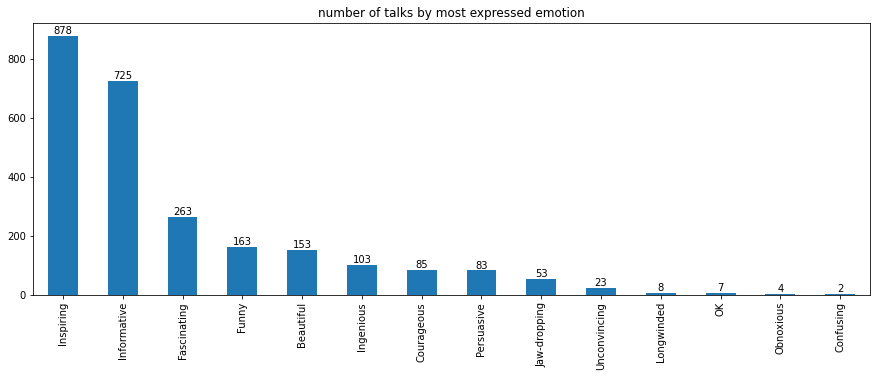

In [17]:
grouped=df.groupby("emotion")["emotion"].count().reset_index(name="count").sort_values("count",ascending=False)
grouped.plot(kind="bar",figsize=(15,5),x="emotion",y="count",title="number of talks by most expressed emotion",xlabel="",legend=False)

def value_labels(y):
    for i in range(len(y)):
        plt.text(i,y.iloc[i],y.iloc[i],size=10,ha="center",va="bottom")
value_labels(grouped["count"])

plt.show()

# Find speakers of which occupation give inspiring and informative talks, which speakers are most funny, ingenious, persuasive etc.

In [19]:
emotions=df.emotion.unique()

for i in emotions:
    print("Most "+i+" speaches are given by people of these occupations: ")
    
    print(df[df.emotion==i].groupby("speaker_occupation")["name"].count().reset_index().sort_values("name",ascending=False)["speaker_occupation"].head(3).to_string(index=False))
    
    print(" ")

Most Inspiring speaches are given by people of these occupations: 
      Writer
Entrepreneur
   Architect
 
Most Funny speaches are given by people of these occupations: 
         Comedian
           Artist
Singer/songwriter
 
Most Informative speaches are given by people of these occupations: 
    Journalist
  Psychologist
Neuroscientist
 
Most Ingenious speaches are given by people of these occupations: 
 Inventor
Architect
   Artist
 
Most Persuasive speaches are given by people of these occupations: 
     Economist
Legal activist
    Journalist
 
Most Jaw-dropping speaches are given by people of these occupations: 
Biologist, genetics pioneer
        Bluegrass musicians
         Software architect
 
Most Longwinded speaches are given by people of these occupations: 
                     Architect
Architect, experience designer
                        Artist
 
Most Fascinating speaches are given by people of these occupations: 
Neuroscientist
     Physicist
 Mathematician
 
Most Cou